# Data Loading_파일 불러오기

In [267]:
# import module

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [268]:
# read file

file_path = ("../data/titanic.csv")

data = pd.read_csv(file_path)
df = pd.DataFrame(data)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# String으로 저장된 열 인코딩하기

In [269]:
# module import

from sklearn.preprocessing import LabelEncoder

In [270]:
# 라벨 인코딩 함수
def label_encode(data, column):
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    return data

# 데이터(data)와 인코딩할 열(column)을 전달하여 label encoding 수행
data = label_encode(data, 'Sex')
data = label_encode(data, 'Embarked')

# 인코딩된 열을 DataFrame에 추가
df['Sex_encoded'] = data['Sex']
df['Embarked_encoded'] = data['Embarked']



# Data Cleaning_결측치 제거

In [271]:
# Data cleaning

df.isnull().sum()

# dropna()함수를 쓰면 데이터가 너무 많이 사라짐

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Sex_encoded           0
Embarked_encoded      0
dtype: int64

In [272]:
# Survived에 필요 없는 Cabin, Name열 삭제
# df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
#       'Parch', 'Ticket', 'Fare', 'Embarked']]

df = df.drop('Cabin', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Sex', axis = 1)
df = df.drop('Embarked', axis = 1)
df = df.drop('Ticket', axis = 1)

# null값이 있는지 확인
df.isnull().sum()

PassengerId           0
Survived              0
Pclass                0
Age                 177
SibSp                 0
Parch                 0
Fare                  0
Sex_encoded           0
Embarked_encoded      0
dtype: int64

In [273]:
# Age는 drop할 수 없기 때문에, 평균값을 구해 null값을 fill함

means = df['Age'].mean()
df['Age'].fillna(means, inplace=True)

df.isnull().sum()

C:\Users\황주신\AppData\Local\Temp\ipykernel_11100\3500469782.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(means, inplace=True)


PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Sex_encoded         0
Embarked_encoded    0
dtype: int64

# Data Cleaning_산점도 확인(outlier)

In [274]:
# module import

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Scatter')

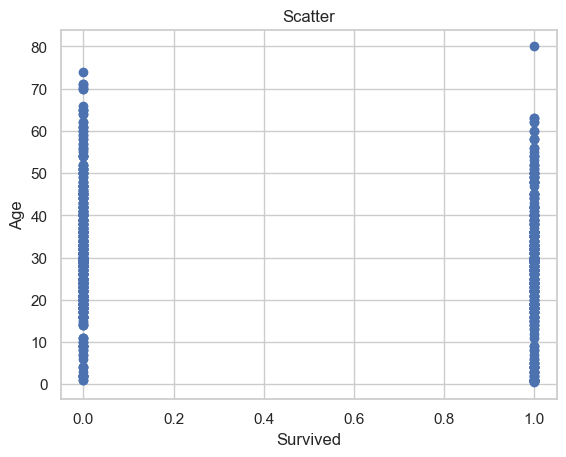

In [275]:
# DataFrame 생성 후 plt로 scatter 그려 outlier 확인

plt.scatter(df['Survived'], df['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Scatter")

C:\Users\황주신\AppData\Local\Temp\ipykernel_11100\3845189936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Age", data = df, palette = "Set3")


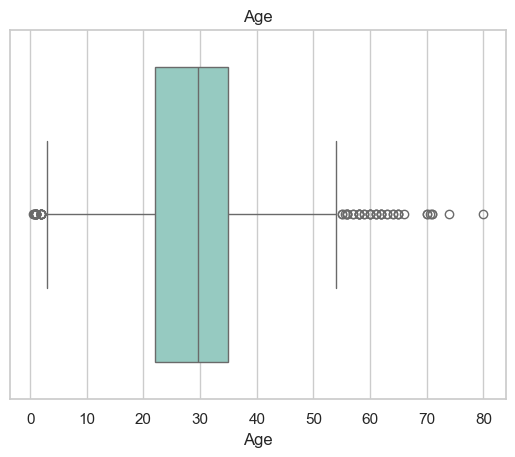

In [276]:
sns.set_theme(style = "whitegrid")
sns.boxplot(x = "Age", data = df, palette = "Set3")
plt.title("Age")
plt.show()

# Data Cleaning_Outlier 제거

In [277]:
#outlier 제거

Q1 = df['Age'].quantile(q=0.25)
Q3 = df['Age'].quantile(q=0.75)

IQR = Q3-Q1

df_IQR_Age = df[(df['Age'] <= Q3+1.5*IQR) & (df['Age'] >= Q1-1.5*IQR)]

Text(0.5, 1.0, 'Scatter')

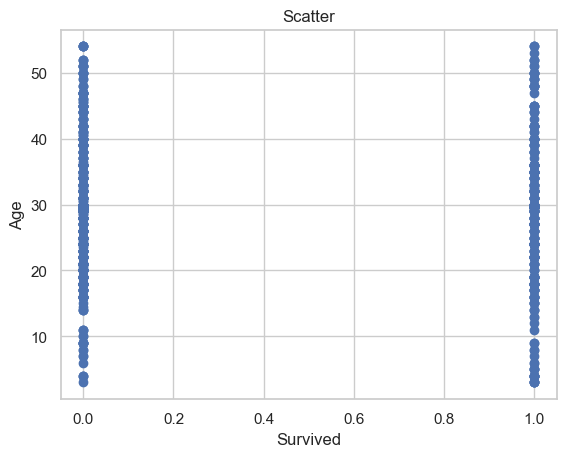

In [278]:
# plt.scatter로 잘 제거되었는지 확인

plt.scatter(df_IQR_Age['Survived'], df_IQR_Age['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Scatter")

C:\Users\황주신\AppData\Local\Temp\ipykernel_11100\4066577875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Age", data = df_IQR_Age, palette = "Set3")


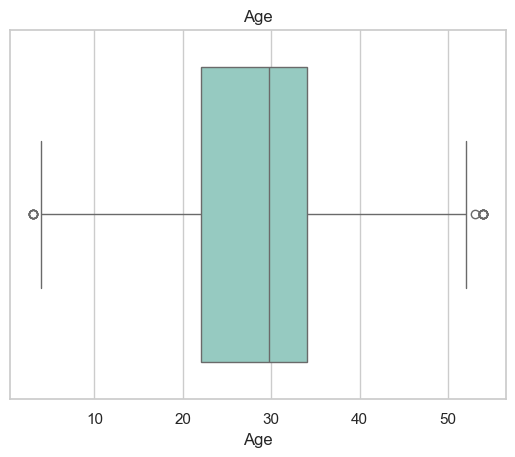

In [279]:
# sns.boxplot으로 잘 제거되었는지 확인

sns.set_theme(style = "whitegrid")
sns.boxplot(x = "Age", data = df_IQR_Age, palette = "Set3")
plt.title("Age")
plt.show()

# feature와 label 나누기

In [280]:
X = df_IQR_Age.drop('Survived', axis = 1)
Y = df_IQR_Age['Survived']

print(X.head())
print()
print(Y.value_counts())

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_encoded  \
0            1       3  22.0      1      0   7.2500            1   
1            2       1  38.0      1      0  71.2833            0   
2            3       3  26.0      0      0   7.9250            0   
3            4       1  35.0      1      0  53.1000            0   
4            5       3  35.0      0      0   8.0500            1   

   Embarked_encoded  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2  

Survived
0    511
1    314
Name: count, dtype: int64


# Train 데이터와 Test 데이터 나누기

In [281]:
# split X_train, Y_train, X_test, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Data Scaling

In [282]:
# module import

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [283]:
# 'Age'와 'Fare' 열만 추출
X_train_subset = X_train[['Age', 'Fare']]
X_test_subset = X_test[['Age', 'Fare']]

In [284]:
# MinMaxScaler()를 사용한 data scaling
scaler_minmax = MinMaxScaler()
X_train_scaled = scaler_minmax.fit_transform(X_train_subset)
X_test_scaled = scaler_minmax.transform(X_test_subset)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train_subset.index,
                                 columns = X_train_subset.columns) 
X_train_scaled_df.head()

,Age,Fare
832,0.523512,0.014110
127,0.411765,0.013940
42,0.523512,0.015412
791,0.254902,0.050749
53,0.509804,0.050749


In [285]:
#StandardScaler()를 사용한 data scaling
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train_subset)
X_test_scaled = scaler_standard.transform(X_test_subset)

X_train_scaled_df = pd.DataFrame(X_train_scaled,
                                 index = X_train_subset.index,
                                 columns = X_train_subset.columns) 
X_train_scaled_df.head()

,Age,Fare
832,0.089271,-0.500217
127,-0.466816,-0.502045
42,0.089271,-0.486288
791,-1.247409,-0.107996
53,0.021055,-0.107996


In [286]:
# 스케일링된 데이터와 다른 열들 합치기

X_test_scaled_df = pd.DataFrame(X_test_scaled,
                                index = X_test_subset.index,
                                columns=['Age', 'Fare'])

X_train_scaled_df = pd.concat([X_train_scaled_df, X_train.drop(columns=['Age', 'Fare'])], axis=1)
X_test_scaled_df = pd.concat([X_test_scaled_df, X_test.drop(columns=['Age', 'Fare'])], axis=1)


# 모델 학습시키고 평가하기

In [287]:
# make model

titanic_ml = LogisticRegression(random_state=0)
titanic_ml_scaled = LogisticRegression(random_state=0)

# fit model
titanic_ml.fit(X_train, Y_train)
titanic_ml_scaled.fit(X_train_scaled_df, Y_train)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

LogisticRegression(random_state=0)

In [288]:
# test model (Not scaled)

pred_titanic = titanic_ml.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_titanic))
print (confusion_matrix(Y_test, pred_titanic))


--- Logistic Regression Classifier ---
0.8363636363636363
[[88 13]
 [14 50]]


In [289]:
# test model (Scaled)

pred_titanic_scaled = titanic_ml_scaled.predict(X_test_scaled_df)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_titanic_scaled))
print (confusion_matrix(Y_test, pred_titanic_scaled))


--- Logistic Regression Classifier ---
0.8484848484848485
[[90 11]
 [14 50]]
